IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\91918\OneDrive\Desktop\ML datasets\archive (5)loan\train_u6lujuX_CVtuZ9i.csv")

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


dropping loan id ,it is not useful

In [7]:
df.drop("Loan_ID",axis=1,inplace=True)

In [8]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Cheking for Null values

In [9]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
nan_cols=['Gender','Married','Dependents','Self_Employed','Credit_History']


In [11]:
nan_cols

['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']

In [15]:
import warnings
warnings.filterwarnings("ignore")

filling nan columns with mode,here these nan_cols present categorical values&nos,so we used mode
when they are only numerical(no outliers)==>mean
numerical+outliers==>median

In [16]:
for c in nan_cols:
    df[c].fillna(df[c].mode()[0],inplace=True)

In [17]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
df["LoanAmount"].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [19]:
df["LoanAmount"].nunique()

203

In [20]:
df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [21]:
df["Loan_Amount_Term"].nunique()

10

loan amount term has 10unique values these are repeated again and again,so fill with mode

In [22]:
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)

In [27]:
df["LoanAmount"].fillna(df["LoanAmount"].mean().round(2),inplace=True)

NaNs

In [28]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

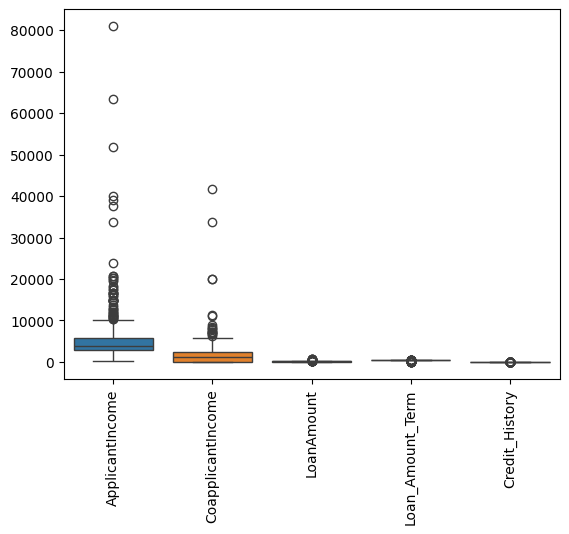

In [32]:
plt.xticks(rotation=90)
sns.boxplot(df)

LABEL ENCODING

Encoding-converting categorical values into numerical values
LABEL ENCODING on dependent col(loan status)

In [ ]:
df

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
label=LabelEncoder()

In [44]:
label

LabelEncoder()

In [46]:
label.fit(df["Loan_Status"])

LabelEncoder()

In [48]:
label.transform(df["Loan_Status"])

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [49]:
ary=label.transform(df["Loan_Status"])

In [50]:
ary


array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [51]:
label.classes_

array(['N', 'Y'], dtype=object)

In [52]:
df["Loan_Status"].map(lambda x: 0 if x=='N' else 1)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [53]:
df["Loan_Status"]=df["Loan_Status"].map(lambda x: 0 if x=='N' else 1)

In [59]:
df["Dependents"]=df["Dependents"].map(lambda x: 3 if x=="3+" else int(x))

In [60]:
df["Dependents"]

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: int64

Other Method to convert Dependants column to Integer

In [61]:
df["Dependents"].replace("3+",3,inplace=True)

In [63]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.41,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.00,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.00,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.00,360.0,1.0,Urban,1


Get Dummies

In [64]:
pd.get_dummies(df,drop_first=True)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,146.41,360.0,1.0,1,True,False,False,False,False,True
1,1,4583,1508.0,128.00,360.0,1.0,0,True,True,False,False,False,False
2,0,3000,0.0,66.00,360.0,1.0,1,True,True,False,True,False,True
3,0,2583,2358.0,120.00,360.0,1.0,1,True,True,True,False,False,True
4,0,6000,0.0,141.00,360.0,1.0,1,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.00,360.0,1.0,1,False,False,False,False,False,False
610,3,4106,0.0,40.00,180.0,1.0,1,True,True,False,False,False,False
611,1,8072,240.0,253.00,360.0,1.0,1,True,True,False,False,False,True
612,2,7583,0.0,187.00,360.0,1.0,1,True,True,False,False,False,True


In [68]:
df=pd.get_dummies(df,drop_first=True)

In [70]:
df.replace([True,False],[0,1],inplace=True)

In [71]:
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,146.41,360.0,1.0,1,0,1,1,1,1,0
1,1,4583,1508.0,128.00,360.0,1.0,0,0,0,1,1,1,1
2,0,3000,0.0,66.00,360.0,1.0,1,0,0,1,0,1,0
3,0,2583,2358.0,120.00,360.0,1.0,1,0,0,0,1,1,0
4,0,6000,0.0,141.00,360.0,1.0,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.00,360.0,1.0,1,1,1,1,1,1,1
610,3,4106,0.0,40.00,180.0,1.0,1,0,0,1,1,1,1
611,1,8072,240.0,253.00,360.0,1.0,1,0,0,1,1,1,0
612,2,7583,0.0,187.00,360.0,1.0,1,0,0,1,1,1,0


Data Seperation

In [73]:
X=df.drop("Loan_Status",axis=1)

In [74]:
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,146.41,360.0,1.0,0,1,1,1,1,0
1,1,4583,1508.0,128.00,360.0,1.0,0,0,1,1,1,1
2,0,3000,0.0,66.00,360.0,1.0,0,0,1,0,1,0
3,0,2583,2358.0,120.00,360.0,1.0,0,0,0,1,1,0
4,0,6000,0.0,141.00,360.0,1.0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.00,360.0,1.0,1,1,1,1,1,1
610,3,4106,0.0,40.00,180.0,1.0,0,0,1,1,1,1
611,1,8072,240.0,253.00,360.0,1.0,0,0,1,1,1,0
612,2,7583,0.0,187.00,360.0,1.0,0,0,1,1,1,0


In [75]:
y=df["Loan_Status"]

In [76]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

IMBALANCE

In [77]:
y.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

<Axes: xlabel='Loan_Status'>

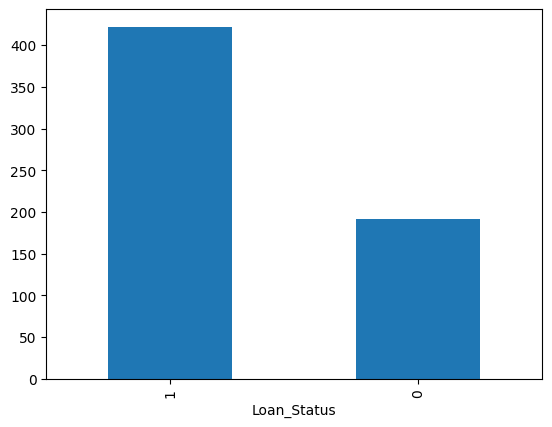

In [78]:
y.value_counts().plot(kind="bar")

In [87]:
from imblearn.over_sampling import RandomOverSampler

In [88]:
ros=RandomOverSampler()

In [90]:
ros

,sampling_strategy,'auto'
,random_state,None
,shrinkage,None


In [91]:
ros.fit_resample(X,y)

(     Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
 0             0             5849                0.0      146.41   
 1             1             4583             1508.0      128.00   
 2             0             3000                0.0       66.00   
 3             0             2583             2358.0      120.00   
 4             0             6000                0.0      141.00   
 ..          ...              ...                ...         ...   
 839           1             4053             2426.0      158.00   
 840           0             6096                0.0      218.00   
 841           3             3522                0.0       81.00   
 842           3             2647             1587.0      173.00   
 843           3             1830                0.0      146.41   
 
      Loan_Amount_Term  Credit_History  Gender_Male  Married_Yes  \
 0               360.0             1.0            0            1   
 1               360.0             1.0        

In [92]:
X_ros,y_ros=ros.fit_resample(X,y)

<Axes: xlabel='Loan_Status'>

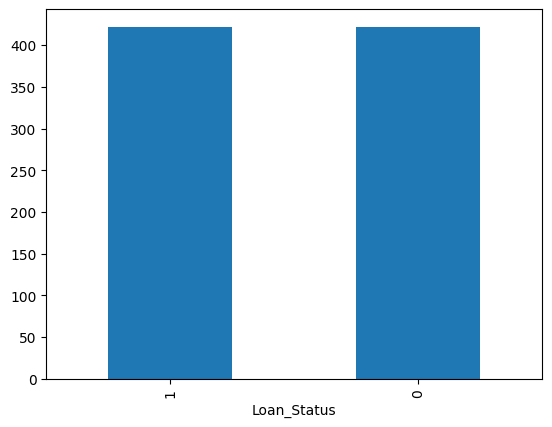

In [93]:
y_ros.value_counts().plot(kind="bar")

DATA SEPERATION

In [94]:
from sklearn.model_selection import train_test_split

In [125]:
X_train,X_test,y_train,y_test=train_test_split(X_ros,y_ros,test_size=0.20,random_state=67)

In [126]:
X_train.shape

(675, 12)

In [127]:
X_test.shape

(169, 12)

MODEL BUILDING

In [128]:
from sklearn.tree import DecisionTreeClassifier

In [129]:
dt_model=DecisionTreeClassifier()

In [130]:
dt_model

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [133]:
dt_model.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [134]:
dt_model.score(X_test,y_test)

0.8579881656804734

AUTO RANDOM STATE

In [138]:
sc_list=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=i)
    dt_model=DecisionTreeClassifier()
    dt_model.fit(X_train,y_train)
    sc=dt_model.score(X_test,y_test)
    sc_list.append(sc)
m=max(sc_list)
print(m)
id=sc_list.index(m)
print(id)
    

0.8211382113821138
777


Cross val score

In [140]:
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold

In [141]:
dt1=DecisionTreeClassifier()

In [142]:
dt1

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [143]:
score=cross_val_score(dt1,X_ros,y_ros,cv=20,n_jobs=-1)

In [144]:
score

array([0.90697674, 0.76744186, 0.8372093 , 0.69767442, 0.80952381,
       0.9047619 , 0.88095238, 0.78571429, 0.9047619 , 0.9047619 ,
       0.9047619 , 0.92857143, 1.        , 0.88095238, 0.80952381,
       0.95238095, 0.88095238, 0.80952381, 0.83333333, 0.9047619 ])

In [146]:
score.mean()

np.float64(0.8652270210409746)

KFold cross validation

In [147]:
kf=KFold(n_splits=20)

In [148]:
kf

KFold(n_splits=20, random_state=None, shuffle=False)

In [149]:
cross_val_score(dt1,X_ros,y_ros,cv=kf,n_jobs=-1)

array([0.86046512, 0.86046512, 0.81395349, 0.79069767, 0.61904762,
       0.78571429, 0.80952381, 0.83333333, 0.88095238, 0.83333333,
       0.78571429, 0.76190476, 0.71428571, 0.80952381, 0.85714286,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [150]:
score1=cross_val_score(dt1,X_ros,y_ros,cv=kf,n_jobs=-1)

In [151]:
score1

array([0.86046512, 0.8372093 , 0.76744186, 0.81395349, 0.66666667,
       0.78571429, 0.78571429, 0.85714286, 0.9047619 , 0.83333333,
       0.78571429, 0.76190476, 0.73809524, 0.78571429, 0.85714286,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [152]:
score1.mean()

np.float64(0.8520487264673312)

StratifiedKFold

In [154]:
from sklearn.model_selection import StratifiedKFold

In [156]:
skf=StratifiedKFold()

In [157]:
skf

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [158]:
cross_val_score(dt1,X_ros,y_ros,cv=skf,n_jobs=-1)

array([0.84023669, 0.80473373, 0.85207101, 0.86390533, 0.82142857])

In [159]:
score3=cross_val_score(dt1,X_ros,y_ros,cv=skf,n_jobs=-1)

In [160]:
score3

array([0.84615385, 0.81656805, 0.83431953, 0.86390533, 0.85119048])

In [161]:
score3.mean()

np.float64(0.8424274443505212)

ACCURACY SCORE

In [170]:
from sklearn.metrics import accuracy_score

In [171]:
dt_model.predict(X_test)

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [172]:
y_pred=dt_model.predict(X_test)

In [173]:
y_pred

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [174]:
accuracy_score(y_test,y_pred)

0.6666666666666666

AUTO ML

In [179]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [180]:
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
log = LogisticRegression()
knc = KNeighborsClassifier()
svc = SVC()

In [181]:
models = [dtc, rfc, abc, gbc, log, knc, svc]
models

[DecisionTreeClassifier(),
 RandomForestClassifier(),
 AdaBoostClassifier(),
 GradientBoostingClassifier(),
 LogisticRegression(),
 KNeighborsClassifier(),
 SVC()]

AUTOML with StratifiedKFold crossvalidation

In [190]:
for m in models:
    skf1=StratifiedKFold(n_splits=20)
    skfscore=cross_val_score(m,X_ros,y_ros,cv=skf1,n_jobs=-1)
    skfscore.mean()
    print(m,"==>",skfscore.mean())

DecisionTreeClassifier() ==> 0.861766334440753
RandomForestClassifier() ==> 0.9114341085271315
AdaBoostClassifier() ==> 0.7334994462901439
GradientBoostingClassifier() ==> 0.8012181616832781
LogisticRegression() ==> 0.6838316722037652
KNeighborsClassifier() ==> 0.6258859357696566
SVC() ==> 0.5247785160575857


In [213]:
dt_new=DecisionTreeClassifier()

In [214]:
dt_new

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [215]:
for n in ["best","random"]:
    for w in ["entropy","gini"]:
        print(n,w)
    

best entropy
best gini
random entropy
random gini


Grid Search CV

In [216]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [217]:
dtt=DecisionTreeClassifier()

In [218]:
param_grid = {
                "splitter" : ["best", "random"],
                "criterion" : ["entropy","gini"],
                "max_depth" : [5,6,7,8],
                "min_samples_split" : [2,3,4,5]
                        }

In [219]:
param_grid

{'splitter': ['best', 'random'],
 'criterion': ['entropy', 'gini'],
 'max_depth': [5, 6, 7, 8],
 'min_samples_split': [2, 3, 4, 5]}

In [220]:
gridcv = GridSearchCV(dt_new, param_grid= param_grid, n_jobs= -1, cv = 20)

In [221]:
gridcv

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['entropy', 'gini'], 'max_depth': [5, 6, ...], 'min_samples_split': [2, 3, ...], 'splitter': ['best', 'random']}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,20
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [222]:
gridcv.fit(X_ros, y_ros)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['entropy', 'gini'], 'max_depth': [5, 6, ...], 'min_samples_split': [2, 3, ...], 'splitter': ['best', 'random']}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,20
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [223]:
gridcv.best_score_

np.float64(0.7681893687707642)

In [224]:
gridcv.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_split': 2,
 'splitter': 'best'}

In [225]:
gridcv.cv_results_

{'mean_fit_time': array([0.0236576 , 0.01552832, 0.01791979, 0.01239539, 0.01750344,
        0.01432163, 0.01718557, 0.01373618, 0.01728722, 0.01221154,
        0.0175931 , 0.01028516, 0.02231089, 0.00983553, 0.0185771 ,
        0.01300417, 0.01854912, 0.01514827, 0.01946956, 0.01278927,
        0.0243559 , 0.01424019, 0.0178051 , 0.01228794, 0.01955998,
        0.01514996, 0.01906763, 0.01182882, 0.02282815, 0.01435385,
        0.021884  , 0.01786619, 0.02289059, 0.01449348, 0.01765804,
        0.01616504, 0.0199366 , 0.01270567, 0.01518313, 0.01330069,
        0.02353086, 0.01125903, 0.02081563, 0.01661489, 0.02191988,
        0.01452332, 0.02704149, 0.01267842, 0.02452072, 0.01535274,
        0.025977  , 0.01606607, 0.02310233, 0.01529031, 0.02413604,
        0.01198028, 0.01244675, 0.01063588, 0.01842493, 0.01382788,
        0.02555108, 0.01211488, 0.02900046, 0.02185947]),
 'std_fit_time': array([0.01013052, 0.00247954, 0.00291619, 0.00200486, 0.00318888,
        0.00294802, 0.003

In [226]:
pd.DataFrame(gridcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_splitter,params,split0_test_score,...,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023658,0.010131,0.008459,0.003779,entropy,5,2,best,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.720930,...,0.714286,0.690476,0.738095,0.619048,0.642857,0.595238,0.666667,0.682558,0.058486,63
1,0.015528,0.002480,0.008653,0.002032,entropy,5,2,random,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.720930,...,0.738095,0.809524,0.690476,0.714286,0.642857,0.690476,0.714286,0.710963,0.050763,39
2,0.017920,0.002916,0.007582,0.001137,entropy,5,3,best,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.720930,...,0.714286,0.690476,0.738095,0.619048,0.642857,0.690476,0.666667,0.687320,0.054953,61
3,0.012395,0.002005,0.007959,0.001292,entropy,5,3,random,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.744186,...,0.714286,0.666667,0.785714,0.690476,0.666667,0.690476,0.690476,0.691971,0.058098,60
4,0.017503,0.003189,0.007659,0.001467,entropy,5,4,best,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.720930,...,0.714286,0.690476,0.738095,0.619048,0.642857,0.595238,0.547619,0.681202,0.070197,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.013828,0.007485,0.010446,0.004998,gini,8,3,random,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.790698,...,0.738095,0.833333,0.738095,0.738095,0.761905,0.690476,0.761905,0.760853,0.067240,4
60,0.025551,0.009101,0.010776,0.006109,gini,8,4,best,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.744186,...,0.833333,0.761905,0.952381,0.690476,0.785714,0.785714,0.690476,0.765808,0.078057,3
61,0.012115,0.008747,0.007808,0.006227,gini,8,4,random,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.767442,...,0.833333,0.738095,0.880952,0.690476,0.714286,0.690476,0.785714,0.745570,0.070810,11
62,0.029000,0.011322,0.011506,0.005145,gini,8,5,best,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.744186,...,0.833333,0.738095,0.952381,0.690476,0.785714,0.785714,0.690476,0.768189,0.082839,1


In [227]:
df_test = pd.read_csv(r"C:\Users\91918\OneDrive\Desktop\ML datasets\archive (5)loan\test_Y3wMUE5_7gLdaTN.csv")

In [228]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [229]:
df_test.drop(['Loan_ID'], axis=1, inplace=True)

In [230]:
df_test.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [231]:
df_test.isna().sum().sum()

np.int64(84)

In [232]:
df_test.dropna(inplace=True)

In [233]:
df_test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [234]:
df_test.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [235]:
df_test["Dependents"].replace('3+', 3).astype("int")

0      0
1      1
2      2
4      0
5      0
      ..
361    1
362    3
363    0
365    0
366    0
Name: Dependents, Length: 289, dtype: int64

In [236]:
df_test["Dependents"] = df_test["Dependents"].replace('3+', 3).astype("int")

<Axes: >

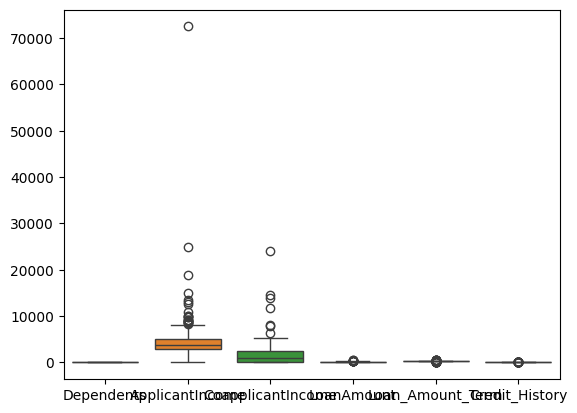

In [237]:
sns.boxplot(df_test)


In [238]:
pd.get_dummies(df_test, drop_first=True).replace([True, False], [1, 0])

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5720,0,110.0,360.0,1.0,1,1,0,0,0,1
1,1,3076,1500,126.0,360.0,1.0,1,1,0,0,0,1
2,2,5000,1800,208.0,360.0,1.0,1,1,0,0,0,1
4,0,3276,0,78.0,360.0,1.0,1,0,1,0,0,1
5,0,2165,3422,152.0,360.0,1.0,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
361,1,2269,2167,99.0,360.0,1.0,1,1,0,0,1,0
362,3,4009,1777,113.0,360.0,1.0,1,1,1,1,0,1
363,0,4158,709,115.0,360.0,1.0,1,1,0,0,0,1
365,0,5000,2393,158.0,360.0,1.0,1,1,0,0,0,0


In [239]:
df_test = pd.get_dummies(df_test, drop_first=True).replace([True, False], [1, 0])

In [240]:
df_test

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5720,0,110.0,360.0,1.0,1,1,0,0,0,1
1,1,3076,1500,126.0,360.0,1.0,1,1,0,0,0,1
2,2,5000,1800,208.0,360.0,1.0,1,1,0,0,0,1
4,0,3276,0,78.0,360.0,1.0,1,0,1,0,0,1
5,0,2165,3422,152.0,360.0,1.0,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
361,1,2269,2167,99.0,360.0,1.0,1,1,0,0,1,0
362,3,4009,1777,113.0,360.0,1.0,1,1,1,1,0,1
363,0,4158,709,115.0,360.0,1.0,1,1,0,0,0,1
365,0,5000,2393,158.0,360.0,1.0,1,1,0,0,0,0


In [243]:
dt_model.predict(df_test)

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1])

In [245]:
res = dt_model.predict(df_test)

In [246]:
df_test["LS_Predicted"] = res

In [247]:
df_test

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,LS_Predicted
0,0,5720,0,110.0,360.0,1.0,1,1,0,0,0,1,1
1,1,3076,1500,126.0,360.0,1.0,1,1,0,0,0,1,1
2,2,5000,1800,208.0,360.0,1.0,1,1,0,0,0,1,0
4,0,3276,0,78.0,360.0,1.0,1,0,1,0,0,1,1
5,0,2165,3422,152.0,360.0,1.0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,1,2269,2167,99.0,360.0,1.0,1,1,0,0,1,0,1
362,3,4009,1777,113.0,360.0,1.0,1,1,1,1,0,1,1
363,0,4158,709,115.0,360.0,1.0,1,1,0,0,0,1,0
365,0,5000,2393,158.0,360.0,1.0,1,1,0,0,0,0,0
